## import lib and data

In [28]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
train_data = torchvision.datasets.MNIST(
    root='./mnist', #保存位置
    train=True, #training set
    transform=torchvision.transforms.ToTensor(), #converts a PIL.Image to torch.FloatTensor(C*H*W) in range(0.0,1.0)
    download=True
)
test_data = torchvision.datasets.MNIST(
    root='./MNIST',
    train=False,
    transform=torchvision.transforms.ToTensor()
)

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


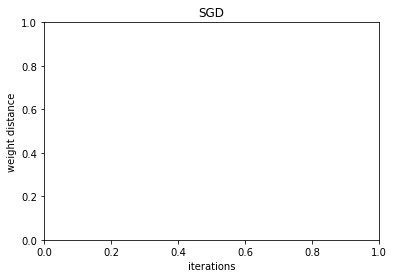

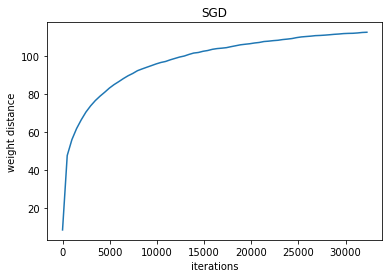

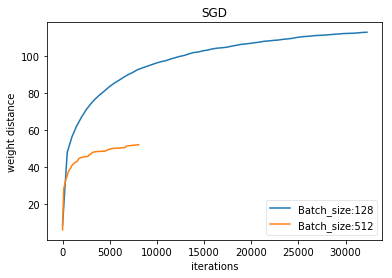

In [42]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
BATCH_SIZE1 = 128

x_index1=np.arange(0,70*468,70*468/66)
x_index2=np.arange(0,70*117,70*117/67)

fig = plt.figure()
plt.title("SGD")
plt.xlabel('iterations')
plt.ylabel('weight distance')
plt.plot(x_index1,distance,label='Batch_size:%s'%BATCH_SIZE1)
plt.plot(x_index2,distance1,label='Batch_size:%s'%BATCH_SIZE)
#plt.axis([-0.1,4,0.0,1.0]) 

#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
#plt.savefig("cSGD para.png") 
plt.show()

## normal train batchsize

In [71]:
from torch.nn.utils import clip_grad_norm
from math import ceil
'''adjust learning with epoch:0: {'optimizer': 'SGD', 'lr':  1e-1, 'weight_decay': 1e-4, 'momentum': 0.9},
                        epoch:10: {'lr': 1e-2},
                        epoch:20: {'lr':  1e-3},
                        epoch:30: {'lr':  1e-4}
'''
'''
def adjust_learning_rate(optimizer, epoch, batchsize):
    if epoch+1 == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-2*(batchsize/128)**0.5
    if epoch+1 == 20:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-3*(batchsize/128)**0.5
    if epoch+1 == 30:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 1e-4*(batchsize/128)**0.5
        
'''       
# main function
def trainnormal(batchsize):
    torch.manual_seed(123) #reproducible

    EPOCH = 50
    BATCH_SIZE = batchsize
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE,shuffle=False)
    num_iters = EPOCH*len(train_loader)
    distance = np.zeros(EPOCH+1)

    # f1 model structure
    class mnist_model(nn.Module):

        def __init__(self):
            super(mnist_model, self).__init__()
            self.layers = nn.Sequential(
                nn.Linear(28 * 28, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                nn.Linear(512, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                nn.Linear(512, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                nn.Linear(512, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                nn.Linear(512, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(True),
                nn.Linear(512, 10),
            )
        def forward(self, inputs):
            return self.layers(inputs.view(inputs.size(0), -1))
    #loss function and opimizer    
    model = mnist_model()
    optimizer = torch.optim.SGD(model.parameters(), lr=(1e-1),weight_decay= 1e-4, momentum=0.9)
    loss_func = nn.CrossEntropyLoss()
    init_weights = [w.data.cpu().clone() for w in list(model.parameters())]
    mini_batch_size = 128
    #train process
    for epoch in range(EPOCH):
    
        #adjust_learning_rate(optimizer,epoch, batchsize)
        #running_loss = 0.0
        for i, data in enumerate(train_loader,0):
           # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs), Variable(labels)

            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            clip_grad_norm(model.parameters(), 5.)     # clip grad avoding grad explosion
            optimizer.step()

            if i==0 and epoch==0: 
                step_dist = 0
                for k, w in enumerate(model.parameters()):  
                    #if k in idxs :    
                    step_dist +=  (w.data.cpu() - init_weights[k]).norm()
                              
                print('%d %d step_dist:%f'%(i+1,epoch+1,step_dist))
                distance[i] = step_dist
            if (i+1)%len(train_loader) ==0:
                step_dist = 0
                for k, w in enumerate(model.parameters()):  
                    #if k in idxs :    
                    step_dist +=  (w.data.cpu() - init_weights[k]).norm()
                              
                print('%d %d step_dist:%f'%(i+1,epoch+1,step_dist))
                distance[epoch+1] = step_dist
            
    print('Finished Training')
    np.save('disgbn%d.npy'%batchsize,distance)

In [72]:
batchsize = [2048,1024,512,256,128,64]

for i in range(0,len(batchsize)):
    trainnormal(batchsize[i])

1 1 step_dist:0.497304
30 1 step_dist:17.478483
30 2 step_dist:19.456394
30 3 step_dist:20.205814
30 4 step_dist:20.772983
30 5 step_dist:21.246148
30 6 step_dist:21.635325
30 7 step_dist:21.950083
30 8 step_dist:22.235406
30 9 step_dist:22.450897
30 10 step_dist:22.624279
30 11 step_dist:22.784964
30 12 step_dist:22.941226
30 13 step_dist:23.100934
30 14 step_dist:23.263596
30 15 step_dist:23.433242
30 16 step_dist:23.606276
30 17 step_dist:23.782369
30 18 step_dist:23.963199
30 19 step_dist:24.146709
30 20 step_dist:24.332400
30 21 step_dist:24.521498
30 22 step_dist:24.713119
30 23 step_dist:24.906811
30 24 step_dist:25.102710
30 25 step_dist:25.300688
30 26 step_dist:25.500517
30 27 step_dist:25.702213
30 28 step_dist:25.905253
30 29 step_dist:26.110446
30 30 step_dist:26.317135
30 31 step_dist:26.530938
30 32 step_dist:26.755775
30 33 step_dist:27.001927
30 34 step_dist:27.261370
30 35 step_dist:27.568394
30 36 step_dist:27.895624
30 37 step_dist:28.206611
30 38 step_dist:28.48328

938 49 step_dist:158.456855
938 50 step_dist:158.603497
Finished Training


D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


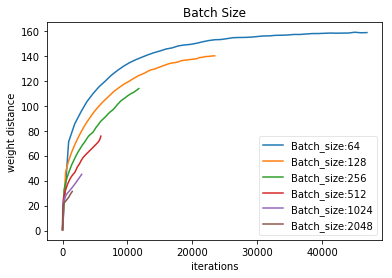

In [77]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
BATCH_SIZE1 = 128
distance64 = np.load('disgbn64.npy')
distance128 = np.load('disgbn128.npy')
distance256 = np.load('disgbn256.npy')
distance512 = np.load('disgbn512.npy')
distance1024 = np.load('disgbn1024.npy')
distance2048 = np.load('disgbn2048.npy')
#distance4096 = np.load('distance4096.npy')
x_index64=np.arange(0,50*938+1,938)
x_index128=np.arange(0,50*469+1,469)
x_index256=np.arange(0,50*235+1,235)
x_index512=np.arange(0,50*118+1,118)
x_index1024=np.arange(0,50*59+1,59)
x_index2048=np.arange(0,50*30+1,30)
#x_index4096=np.arange(0,70*15+1,15)

fig = plt.figure()
plt.title("Batch Size")
plt.xlabel('iterations')
plt.ylabel('weight distance')
plt.plot(x_index64,distance64,label='Batch_size:64')
plt.plot(x_index128,distance128,label='Batch_size:128')
plt.plot(x_index256,distance256,label='Batch_size:256')
plt.plot(x_index512,distance512,label='Batch_size:512')
plt.plot(x_index1024,distance1024,label='Batch_size:1024')
plt.plot(x_index2048,distance2048,label='Batch_size:2048')
#plt.plot(x_index4096,distance4096,label='Batch_size:4096')
#plt.axis([-0.1,4,0.0,1.0]) 

#plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
plt.savefig("batchsize normal.png") 
plt.show()